# H2 dimer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rotation_matrix(normal, angle):
    cos = np.cos(angle)
    sin = np.sin(angle)
    
    cross_product_matrix = np.array([
                                    [ 0,         -normal[2],  normal[1]],
                                    [ normal[2],  0,         -normal[0]],
                                    [-normal[1],  normal[0],  0        ]
                                   ])
    
    outer_product = np.outer(normal, normal)
    
    identity = np.identity(3)
    
    R = cos * identity + sin * cross_product_matrix + (1-cos) * outer_product
    
    return R

def write_files():
    angstrom_to_bohr = 1.88973

    origin = np.array([[0., 0., -0.65], [0., 0., 0.65]])

    for sep in [5, 10, 15, 20, 25, 30]:
        moved  = np.array([[0., 0., -0.7], [0., 0., 0.7]])
        moved[:, 0] += sep
        
        full_scan = open(f"xyzs/full_scan_sep_{sep}.xyz", 'w')
        
        for angle in np.linspace(0, 2*np.pi, 100):
            rot_mat = rotation_matrix([1, 0, 0], angle)
            moved = [np.dot(rot_mat, x) for x in moved]
            
            file = open(f"xyzs/angle_{int(np.rad2deg(angle))}_sep_{sep}.xyz", 'w')
            
            print("4", file = full_scan)
            print("4", file = file)
            print("",  file = full_scan)
            print("",  file = file)
            
            print("H", np.array2string(origin[0] / angstrom_to_bohr, formatter={'float_kind':lambda x: "%.5f" % x})[1:-1], file = full_scan)
            print("H", np.array2string(origin[1] / angstrom_to_bohr, formatter={'float_kind':lambda x: "%.5f" % x})[1:-1], file = full_scan)
            
            print("H", np.array2string(origin[0] / angstrom_to_bohr, formatter={'float_kind':lambda x: "%.5f" % x})[1:-1], file = file)
            print("H", np.array2string(origin[1] / angstrom_to_bohr, formatter={'float_kind':lambda x: "%.5f" % x})[1:-1], file = file)

            print("H", np.array2string(moved[0] / angstrom_to_bohr, formatter={'float_kind':lambda x: "%.5f" % x})[1:-1], file = full_scan)
            print("H", np.array2string(moved[1] / angstrom_to_bohr, formatter={'float_kind':lambda x: "%.5f" % x})[1:-1], file = full_scan)
            
            print("H", np.array2string(moved[0] / angstrom_to_bohr, formatter={'float_kind':lambda x: "%.5f" % x})[1:-1], file = file)
            print("H", np.array2string(moved[1] / angstrom_to_bohr, formatter={'float_kind':lambda x: "%.5f" % x})[1:-1], file = file)
            
            file.close()
            
        full_scan.close()

In [4]:
write_files()

In [5]:
import os
import sys
import importlib 

sys.path.insert(0, '..')
import read_Bchla_xTB
importlib.reload(read_Bchla_xTB)
import read_tddft
importlib.reload(read_tddft)
import make_json
importlib.reload(make_json)
import data_objects
importlib.reload(data_objects)
import frenkel_hamiltonians
importlib.reload(frenkel_hamiltonians)

import matplotlib
matplotlib.rcParams.update({"font.size" : 22})

In [6]:
test = read_tddft.read_dimer_TDDFT_file("HF/angle_0_sep_10.out")
test.excitations
test.transition_dipoles

[array([-0.        , -0.        ,  1.16995182])]

In [12]:
def read_scan(separation):
    
    angles = []
    excitations = [[],[],[],[],[]]
    transition_dipole_mags = [[],[],[],[],[]]
    
    for angle in np.linspace(0, 2*np.pi, 100):
        result = read_tddft.read_dimer_TDDFT_file(f"HF/angle_{int(np.rad2deg(angle))}_sep_{separation}.out")
    
        angles.append(np.rad2deg(angle))
        
        for enum, i in enumerate(result.excitations):
            excitations[enum].append(i)

        for enum, i in enumerate(result.transition_dipoles):
            transition_dipole_mags[enum].append(np.linalg.norm(i))
            
    return {"angles" : angles,
            "excitations" : excitations,
            "transition_dipole_mags" : transition_dipole_mags
           }

In [13]:
scan_5  = read_scan(5)
scan_10 = read_scan(10)
scan_15 = read_scan(15)
scan_20 = read_scan(20)
scan_25 = read_scan(25)
scan_30 = read_scan(30)

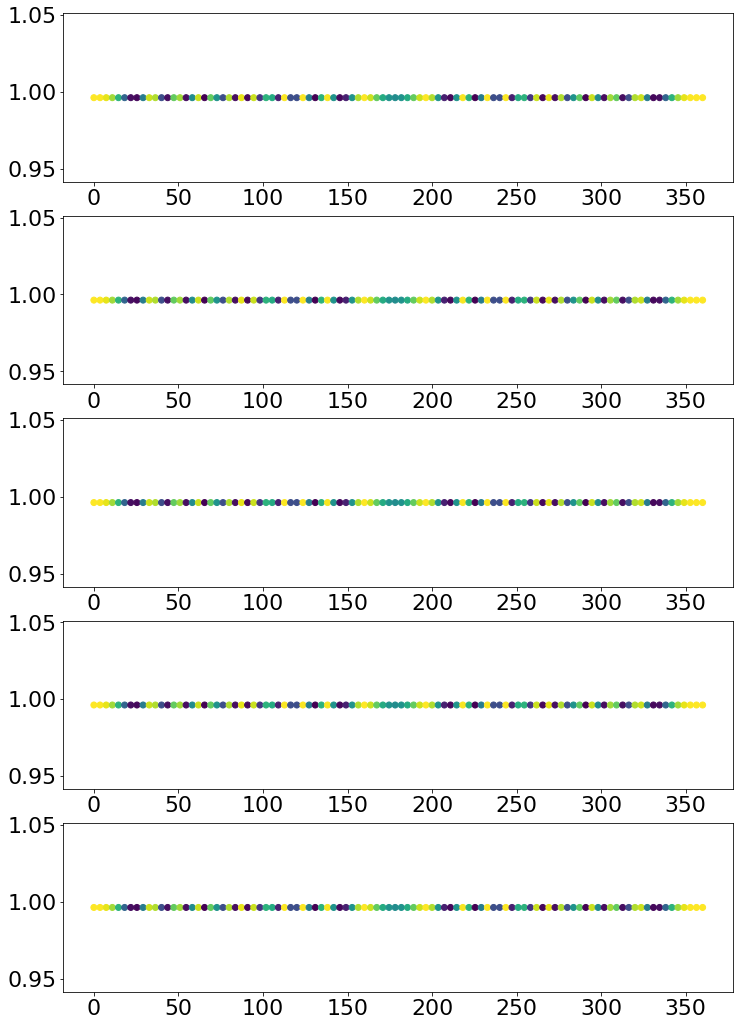

In [18]:
scans = [scan_5, scan_10, scan_15, scan_20, scan_25, scan_30]

fig, ax = plt.subplots(5, 1)

for axis, scan in zip(ax.ravel(), scans):
    #axis.scatter(scan_25["angles"], scan_25["excitations"][0], c=scan_25["transition_dipole_mags"][0])
    axis.scatter(scan_25["angles"], scan_25["excitations"][1], c=scan_25["transition_dipole_mags"][1])
    #axis.scatter(scan_25["angles"], scan_25["excitations"][2], c=scan_25["transition_dipole_mags"][2])
    #axis.scatter(scan_25["angles"], scan_25["excitations"][3], c=scan_25["transition_dipole_mags"][3])
    #axis.scatter(scan["angles"], scan["excitations"][4], c=scan["transition_dipole_mags"][4])

fig.set_size_inches(12,18)